In [331]:
import pandas as pd

In [332]:
import numpy as np

In [333]:
data = pd.read_csv('TrainingDataset(CSV_Modified).csv')

In [334]:
from sklearn.feature_extraction.text import CountVectorizer

In [353]:
import string
import re
import nltk
#nltk.download('wordnet')
#nltk.download('omw-1.4')
#from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
def clean_text(df):
    df = " ".join([c for c in df if c not in string.punctuation])
    df = re.sub(r'\d+', '', df)
    tokens = word_tokenize(df)
    custom_stopwords_list = ['verify', 'user', 'able', 'project', 'test', 'case', 'A']
    stop_words = set(stopwords.words("english") + custom_stopwords_list)
    stop_words.discard("not")
    PS = PorterStemmer()
    #WNL = WordNetLemmatizer()
    df = [PS.stem(word) for word in tokens if word not in stop_words]
    return df

In [336]:
cv = CountVectorizer(analyzer=clean_text)

In [337]:
X = cv.fit_transform(data['Name'])
print(X.shape)

(75, 179)


In [338]:
print(cv.get_feature_names())

['access', 'add', 'address', 'admin', 'allow', 'api', 'approv', 'artifact', 'associ', 'attempt', 'auto', 'avail', 'ba', 'backup', 'base', 'batch', 'beabl', 'bin', 'case', 'casesget', 'caus', 'chang', 'charact', 'check', 'claus', 'config', 'constraint', 'creat', 'createupd', 'createupdateget', 'cross', 'data', 'databas', 'default', 'defect', 'delet', 'detail', 'develop', 'devop', 'dialog', 'disabl', 'display', 'displayupd', 'document', 'dont', 'edit', 'email', 'enabl', 'enter', 'error', 'event', 'exceed', 'excel', 'exist', 'export', 'featur', 'field', 'file', 'fill', 'find', 'findbytestcas', 'flag', 'function', 'get', 'grid', 'histori', 'hyperlink', 'id', 'importedupload', 'in', 'includ', 'installationconfigur', 'integr', 'invalid', 'item', 'jira', 'jirawidget', 'k', 'latest', 'ldap', 'level', 'link', 'list', 'local', 'log', 'longer', 'manag', 'map', 'method', 'modul', 'network', 'new', 'newli', 'no', 'not', 'notif', 'object', 'off', 'old', 'on', 'op', 'open', 'option', 'pad', 'page', '

In [339]:
df = pd.DataFrame(X.toarray(), columns = cv.get_feature_names())
df.head(10)

,access,add,address,admin,allow,api,approv,artifact,associ,attempt,...,verifi,version,via,view,violat,warn,webhook,when,without,xss
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0


In [340]:
print(X.toarray().sum(axis=0))

[21  4  3  2  2 10  5  2  2  2  1  1  1  1  1  1  1 17 23  1  1 11  1  1
  1  1  1  1  1  1  1 13  1  1  8 23  1  1  2  1  1  2  1  3  1  1 12  1
  1  1  1  1  2  3  3  7 10  2  1  1  1  8  2  1  2  3  1  1  1  6  1  2
  1  3  1  6  1  1  1  1  2  9  1  1  4  2  5  1  2  2  1  4  1  2 10  3
  1  2  2  4  1  1  1  1  1  1  1  2  2  2  5  1  1 13  8  1  1  4  4  1
  1 11  1 17  1  2  1  1  9  1  2  2  1 14 16  1  1  2  2  1  5  5 34  4
  3  4  1  3  1  3  1 32  2  2  2  3  1  3  1  1  1  1  7  1  1  2 10  1
  1 53  2  4  9  1  3  3  2  3  1]


In [341]:
count_list = np.asarray(X.sum(axis=0))[0]

In [342]:
word_list = cv.get_feature_names()

In [343]:
print(dict(zip(word_list, count_list)))

{'access': 21, 'add': 4, 'address': 3, 'admin': 2, 'allow': 2, 'api': 10, 'approv': 5, 'artifact': 2, 'associ': 2, 'attempt': 2, 'auto': 1, 'avail': 1, 'ba': 1, 'backup': 1, 'base': 1, 'batch': 1, 'beabl': 1, 'bin': 17, 'case': 23, 'casesget': 1, 'caus': 1, 'chang': 11, 'charact': 1, 'check': 1, 'claus': 1, 'config': 1, 'constraint': 1, 'creat': 1, 'createupd': 1, 'createupdateget': 1, 'cross': 1, 'data': 13, 'databas': 1, 'default': 1, 'defect': 8, 'delet': 23, 'detail': 1, 'develop': 1, 'devop': 2, 'dialog': 1, 'disabl': 1, 'display': 2, 'displayupd': 1, 'document': 3, 'dont': 1, 'edit': 1, 'email': 12, 'enabl': 1, 'enter': 1, 'error': 1, 'event': 1, 'exceed': 1, 'excel': 2, 'exist': 3, 'export': 3, 'featur': 7, 'field': 10, 'file': 2, 'fill': 1, 'find': 1, 'findbytestcas': 1, 'flag': 8, 'function': 2, 'get': 1, 'grid': 2, 'histori': 3, 'hyperlink': 1, 'id': 1, 'importedupload': 1, 'in': 6, 'includ': 1, 'installationconfigur': 2, 'integr': 1, 'invalid': 3, 'item': 1, 'jira': 6, 'jira

In [344]:
def test(df):
    status = df["Status"].values.tolist()
    desc = df["Name"].values.tolist()
    words = list()
    k = 0
    s = 0
    freq = list()
    i = 0
    for text in desc:
        if text not in words:
            if status[i] == -1 or status[i] == 1:
                words.insert(k, text)
                s += status[i]
            else:
                continue
            freq.insert(k, s)
            k = k + 1
            i = i + 1
        else:
            freq.insert(k, status[i])
            i = i + 1
            k = k + 1
    return (dict(zip(words, freq)))

In [345]:
print(test(data))

{'Verify test case history when change "Project share to" field property': -1, 'Verify test case history when change Projects share in Test Case Sharing setting': -2, 'Verify that user with QA profile(without the recycle bin delete privilege) should be able to restore the deleted artifacts': -3, 'Verify notification for email change': -4, 'Verify Requirement Field in Test Run Data Query - No Root project access for the user': -5, 'Verify User Should able to view but not access shared Cases linked Requirements on Test run grid not having access of Root project.': -6, 'Verify Share Test Case Properties for Test Case no longer shared - In case update in "Project Shared to" field from Root Project': -7, 'Verify Shared Test Case Properties for Test Case no longer shared - In case update in Test Case Sharing setting in root project': -8, 'Verify Shared Test Case Properties for Test Case - In case update in Test Case Sharing setting in used shared Test Case project': -9, 'Verify Requirement F

In [354]:
from wordcloud import STOPWORDS
custom_stopwords_list = ['verify', 'user', 'able', 'project', 'test', 'case', 'A']
stopWords = STOPWORDS
stopWords.update(custom_stopwords_list)
stopWords.remove("not") if 'not' in stopWords else None

In [383]:
import matplotlib.pyplot as plt

def word_cloud(df_data,pStatus,nStatus,column, stopWords):
    
    df_nstatus = df_data.loc[df_data.Status == nStatus, column]
    j = (' '.join(df_nstatus))
    nList = list(j.split(" "))
    
    df_pstatus = df_data.loc[df_data.Status == pStatus, column]
    k = (' '.join(df_pstatus))
    pList = list(k.split(" "))
    
    common_words = list()
    
    for wj in pList:
        for wk in nList:
            if wj == wk:
                common_words.append(wj)
#                 j = j.replace(wj, "")
#                 k = k.replace(wj, "")
                nList.remove(wj) if wj in nList else None
                pList.remove(wj) if wj in pList else None
            else:
                continue
    new_list = common_words + nList + pList
    cmon_words, neglist, poslist = clean_text(common_words), clean_text(nList), clean_text(pList)
    return cmon_words, neglist, poslist

In [384]:
# def clean_text(df):
#     descriptions = list()
# #    df = pd.DataFrame(data)
#     lines = df.values.tolist()
#     for text in lines:
#         text = text.lower()
#         pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
#         text = pattern.sub('', text)
#         text = re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", text)
#         tokens = word_tokenize(text)
#         table = str.maketrans('', '', string.punctuation)
#         stripped = [w.translate(table) for w in tokens]
#         words = [word for word in stripped if word.isalpha()]
#         custom_stopwords_list = ['verify', 'user']
#         stop_words = set(stopwords.words("english") + custom_stopwords_list)
#         stop_words.discard("not")
#         PS = PorterStemmer()
#         words = [PS.stem(w) for w in words if not w in stop_words]
#         words = ' '.join(words)
#         descriptions.append(words)
#     return descriptions

In [412]:
from collections import Counter
common, negative, positive = word_cloud(data,1,-1,'Name',stopWords)
#dataset = pd.DataFrame(old_text)
#new_text = clean_text(old_text)
common_words = list(common)
nList = list(negative)
pList = list(positive)
#type(words)
#desc = (' '.join(str(w) for w in words))
#desc = (' '.join(map(str,words)))
#desc = desc.replace("\t","")
#desc = (' '.join(words))
# cmnwords_str = str(common_words)
# negList_str = str(nList)
# posList_str = str(pList)
# cmnwords_str = cmnwords_str.split(" ")
# negList_str = negList_str.split(" ")
# posList_str = posList_str.split(" ")
# unique_cmn = Counter(cmnwords_str)
# unique_neg = Counter(negList_str)
# unique_pos = Counter(posList_str)
# unique_cmn = " ".join(unique.keys())
# unique_pos = " ".join(unique.keys())
# unique_neg = " ".join(unique.keys())
# sample1 = unique_cmn.split()
# sample2 = unique_neg.split()
# sample3 = unique_pos.split()
# cleaned_cmn = clean_text(sample1)
# cleaned_neg = clean_text(sample2)
# cleaned_pos = clean_text(sample3)
# Counter(cleaned_cmn)
# Counter(cleaned_neg)
# Counter(cleaned_pos)

common_words = list(dict.fromkeys(common_words))
nList = list(dict.fromkeys(nList))
pList = list(dict.fromkeys(pList))
common_words = clean_text(common_words)
nList

['histori',
 'share',
 'set',
 'profil',
 '(',
 'without',
 'delet',
 'notif',
 'no',
 'grid',
 'longer',
 'updat',
 'use',
 'when',
 'export',
 'view-',
 'swagger',
 'document',
 'manag',
 '..',
 '-',
 'sent',
 'old',
 'new',
 'email',
 '.',
 'webhook',
 'regist',
 'qtest',
 'vera',
 'payload']

['histori',
 'share',
 'set',
 'profil',
 '(',
 'without',
 'delet',
 'notif',
 'no',
 'grid',
 'longer',
 'updat',
 'use',
 'when',
 'export',
 'view-',
 'swagger',
 'document',
 'manag',
 '..',
 '-',
 'sent',
 'old',
 'new',
 'email',
 '.',
 'webhook',
 'regist',
 'qtest',
 'vera',
 'payload']

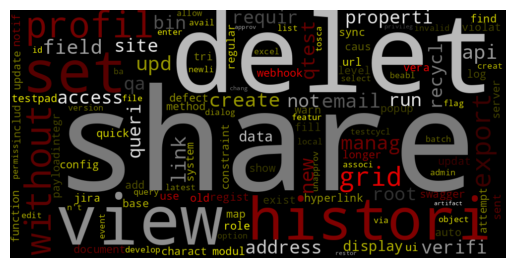

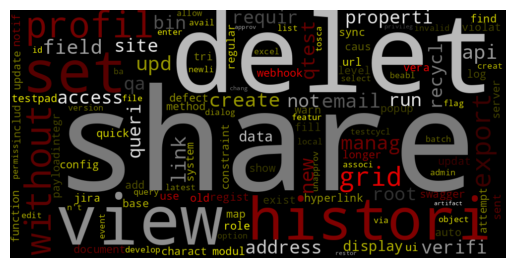

In [411]:
from wordcloud import (WordCloud, get_single_color_func)
import matplotlib.pyplot as plt


class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
       to certain words based on the color to words mapping

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)


class GroupedColorFunc(object):
    """Create a color function object which assigns DIFFERENT SHADES of
       specified colors to certain words based on the color to words mapping.

       Uses wordcloud.get_single_color_func

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)


neg_words = ' '.join(nList)
pos_words = ' '.join(pList)
common = ' '.join(common_words)

text = neg_words + pos_words + common

# Since the text is small collocations are turned off and text is lower-cased
wc = WordCloud(width = 1000, height = 500,collocations=False).generate(text)

color_to_words = {
    # words below will be colored with a green single color function
    'grey': ['requir','data','run','queri','api','share','properti','field','``','delet','verifi','qa','recycl','not',
                'bin','access','site','privileg','restor','artifact','chang','email','address','root','view','approv','link',
                '``'],
    # will be colored with a red single color function
    'red': ['histori','share','set','profil','(','without','delet','notif','no','grid','longer','updat','use','when','export',
            'view-','swagger','document','manag','..','-','sent','old','new','email','.','webhook','regist','qtest','vera','payload'], 
}

# Words that are not in any of the color_to_words values
# will be colored with a grey single color function
default_color = 'yellow'

# Create a color function with single tone
# grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color)

# Create a color function with multiple tones
grouped_color_func = GroupedColorFunc(color_to_words, default_color)

# Apply our color function
wc.recolor(color_func=grouped_color_func)

# Plot
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()